# 02 — Experience Study (Mortality A/E)
Load synthetic data and compute A/E by age.

In [11]:
# Make paths project-root relative
from pathlib import Path
import sys

PROJECT_ROOT = Path.cwd().parent          # notebooks/ -> project root
sys.path.append(str(PROJECT_ROOT / "src"))  # import from src/

data_dir = PROJECT_ROOT / "data" / "raw"

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from src.experience import expand_exposure_years, actual_expected

In [13]:
pol  = pd.read_csv(data_dir / "policies.csv")
mort = pd.read_csv(data_dir / "mortality_table.csv")
expos = expand_exposure_years(pol)
ae_by_age = actual_expected(expos, mort, ['attained_age'])
ae_by_age.head()

,attained_age,exposure,actual,expected,AE
0,20,23.5,0,0.004440,0.0
1,21,43.0,0,0.008757,0.0
2,22,58.5,0,0.012842,0.0
3,23,85.0,0,0.020113,0.0
4,24,105.5,0,0.026908,0.0


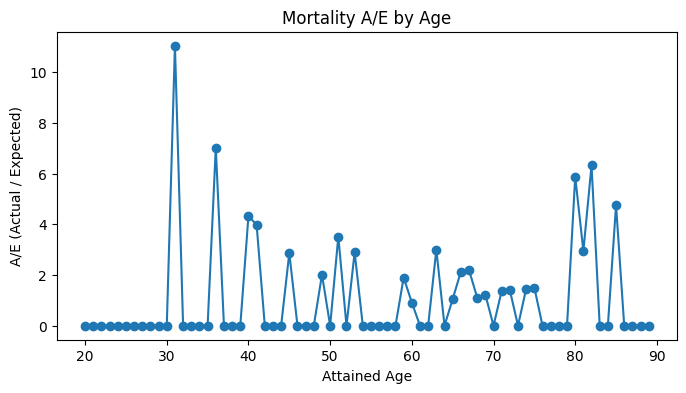

In [14]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(ae_by_age['attained_age'], ae_by_age['AE'], marker='o')
ax.set_xlabel('Attained Age')
ax.set_ylabel('A/E (Actual / Expected)')
ax.set_title('Mortality A/E by Age')
plt.show()